<a href="https://colab.research.google.com/github/yjb-git/colab/blob/main/protein_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/10GS.cif'

In [ ]:
!pip install Bio

In [ ]:
from Bio.PDB import MMCIFParser

parser = MMCIFParser(QUIET=True)
structure = parser.get_structure("10gs", path)

for atom in structure.get_atoms():
    print(atom.get_name(), atom.coord)
    break


N [31.242  3.064 39.284]


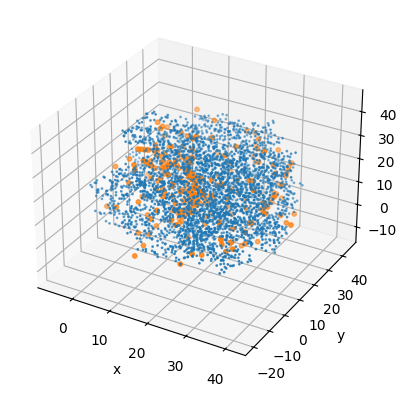

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
prot = []
het  = []

for atom in structure.get_atoms():
    res = atom.get_parent()
    # HETATM(리간드/이온/물 등)은 residue.id[0] != ' '
    if res.id[0] == ' ':
        prot.append(atom.coord)
    else:
        het.append(atom.coord)

prot = np.array(prot)
het = np.array(het)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

if len(prot) > 0:
    ax.scatter(prot[:,0], prot[:,1], prot[:,2], s=1)
if len(het) > 0:
    ax.scatter(het[:,0], het[:,1], het[:,2], s=10)

ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()
ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()


In [ ]:
import plotly.graph_objects as go
prot = []
het  = []

for atom in structure.get_atoms():
    res = atom.get_parent()
    # residue.id[0] == ' '  → 일반 단백질 residue(ATOM)
    # residue.id[0] != ' '  → HETATM (리간드/이온/물 등)
    if res.id[0] == ' ':
        prot.append(atom.coord)
    else:
        het.append(atom.coord)

prot = np.asarray(prot)
het  = np.asarray(het)

fig = go.Figure()

if prot.size > 0:
    fig.add_trace(go.Scatter3d(
        x=prot[:,0], y=prot[:,1], z=prot[:,2],
        mode="markers",
        marker=dict(size=1, opacity=0.5),
        name="Protein (ATOM)"
    ))

if het.size > 0:
    fig.add_trace(go.Scatter3d(
        x=het[:,0], y=het[:,1], z=het[:,2],
        mode="markers",
        marker=dict(size=4, opacity=0.9),
        name="HETATM (ligand/water/ions)"
    ))

fig.update_layout(
    title="Protein–Ligand Complex (3D)",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
        aspectmode="data",  # 축 비율을 데이터 스케일대로
    ),
    legend=dict(itemsizing="constant")
)

fig.show()


In [ ]:
for atom in structure.get_atoms():
    print(atom.element)
    break


N


In [ ]:
import plotly.graph_objects as go
import numpy as np

coords = {"C": [], "N": [], "O": [], "S": []}

for atom in structure.get_atoms():
    elem = atom.element
    if elem in coords:
        coords[elem].append(atom.coord)

colors = {
    "C": "gray",
    "N": "blue",
    "O": "red",
    "S": "yellow"
}

fig = go.Figure()

for elem in coords:
    arr = np.array(coords[elem])
    if len(arr) == 0:
        continue

    fig.add_trace(go.Scatter3d(
        x=arr[:,0], y=arr[:,1], z=arr[:,2],
        mode="markers",
        marker=dict(size=1, color=colors[elem]),
        name=elem
    ))

fig.show()


# 새 섹션

In [ ]:
import numpy as np

# structure는 이미 로드되어 있다고 가정
# (PDBParser/MMCIFParser로 get_structure 한 결과)

protein_C = []

for atom in structure.get_atoms():
    res = atom.get_parent()          # residue
    if res.id[0] != ' ':             # HETATM(리간드/물/이온 등) 제외
        continue

    if atom.element == 'C':          # 탄소만
        protein_C.append(atom.coord)

protein_C = np.asarray(protein_C)    # (N, 3)

print(protein_C.shape)               # 좌표 개수 확인
print(protein_C[:5])                 # 앞 5개



(2094, 3)
[[31.195  2.392 37.963]
 [29.975  2.923 37.197]
 [31.063  0.905 38.251]
 [30.276  0.947 39.549]
 [30.829  2.121 40.343]]
